In [1]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Makes plots interactive
%matplotlib notebook

import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

# Introduction to GIS - Using GeoPandas

- Dennis Milechin, P.E.
- <a href="http://rcs.bu.edu">Research Computing Services</a>

## Github repo
https://github.com/milechin/tut_geopandas

## Data Files
http://rcs.bu.edu/examples/gis/tutorials/python_geopandas/tutorial_files.zip

# Workshop Outcomes

1. Learn basic concepts of GIS Theory (Data Models, Datum/Geographic Coordinate system, Projections)
1. Learn how to apply GIS concepts using GeoPandas.

# Outline

1. What is GIS?
1. Common GIS Data Models
1. Explore GeoPandas
1. Datum/Geographic Coordinate System (GCS)
1. GCS Coordinates
1. Projections
1. Coordinate Reference System (CRS)
1. Spatial Attributes
1. Spatial Processing


# 1. What is GIS?

“A geographic information system (GIS) is a system designed to capture, store, manipulate, analyze, manage, and present spatial or geographic data”

<sup>Source: https://en.wikipedia.org/wiki/Geographic_information_system</sup>


## Typical functions of GIS software

- Read/write spatial data
- Maintain spatial meta data
- Apply transformations for projections
- Visualize symbology based on attribute table
- Allow layering of data
- Tools to query/filter data
- Spatial analysis tools
- Exporting tools for printing maps or publish web maps


### Build Your Own GIS Toolbox
My toolbox:
- Organizing data - OGR/GDAL
- Data storage - GeoPackage or PostgresSQL w/PostGIS
- GIS Task Automation - R or Python
- Visualizations for Reports - QGIS or ArcGIS Pro
- Visualization for Web Maps - ArcGIS Online - (others use Leaflet)

# 2. Common GIS Data Models

- Raster
- Vector

### Raster

- continuous data
- uniform gridded data
- Examples
    - Digital Elevation Model (DEM)
    - Remote Sensing - Bands
    
<img src="files/images/raster_example.png" alt="compass" style="width:1000px"/>    

<sup>Source: <a href=": http://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/what-is-raster-data.htm"> http://desktop.arcgis.com/en/arcmap/latest/manage-data/raster-and-images/what-is-raster-data.htm</a></sup>

### Vector

<img src="files/images/vector_data.png" alt="compass" style="width:800px"/>    



# 3. Let's Explore GeoPandas

> GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

<sup>source: https://geopandas.org/index.html</sup>

__Note:__ GeoPandas is for processing vector data.

User Guide: https://geopandas.org/docs/user_guide.html

### GeoPandas - Dependencies

- __numpy__
- __pandas__
- __shapely__  - Spatial Operations
- __fiona__  - Reading and Writing Files
- __pyproj__ - Projection definition and transformations
- __rtree__ - spatial index to improve performance and required for overlay operations; interface to libspatialindex
- __psycopg2__ - for PostGIS connection
- __GeoAlchemy2__ - for writing to PostGIS
- __geopy__ - for geocoding
- __matplotlib__
- __mapclassify__

Source: https://geopandas.org/getting_started/install.html#dependencies

### Read Shapefile


In [2]:
import geopandas

mbta_stations = geopandas.read_file("tutorial_files/mbta_rapid_transit/MBTA_NODE.shp")
mbta_stations.head()

,STATION,LINE,TERMINUS,ROUTE,geometry
0,Ashmont,RED,Y,A - Ashmont C - Alewife,POINT (236007.538 892693.023)
1,Harvard,RED,N,A - Ashmont B - Braintree C - Alewife,POINT (231387.274 902684.016)
2,Kendall/MIT,RED,N,A - Ashmont B - Braintree C - Alewife,POINT (234087.917 901406.551)
3,Capen Street,RED,N,Mattapan Trolley,POINT (234055.438 890869.375)
4,Tufts Medical Center,ORANGE,N,Forest Hills to Oak Grove,POINT (235900.324 899934.313)


- "geometry" column contains spatial information.
- rows - known as "features" or "records".
- columns - known as "attributes" or "fields".

Let's look at types for each column:

In [3]:
mbta_stations.dtypes

STATION       object
LINE          object
TERMINUS      object
ROUTE         object
geometry    geometry
dtype: object

In [4]:
type(mbta_stations)

geopandas.geodataframe.GeoDataFrame

### Plotting

<IPython.core.display.Javascript object>


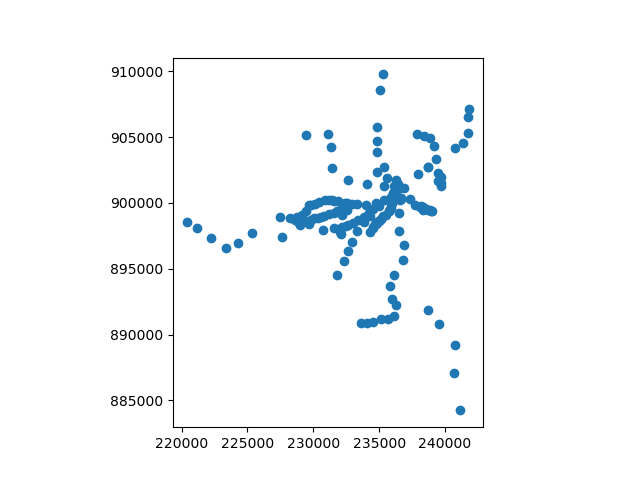

<AxesSubplot:>

In [5]:
mbta_stations.plot()

<IPython.core.display.Javascript object>


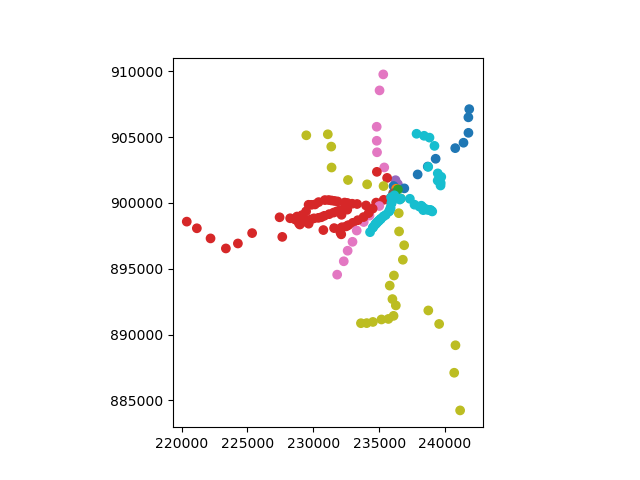

<AxesSubplot:>

In [6]:
mbta_stations.plot(column="LINE", legend=False)

### Load Polyline Data

In [7]:
mbta_lines = geopandas.read_file("tutorial_files/mbta_rapid_transit/MBTA_ARC.shp")
mbta_lines.head()

,LINE,ROUTE,GRADE,SHAPE_LEN,geometry
0,SILVER,SL3,3,79.538315,"LINESTRING (238786.088 902727.200, 238786.654 ..."
1,SILVER,SL3,1,439.557315,"LINESTRING (238823.606 904952.475, 238807.669 ..."
2,SILVER,SL3,1,680.245154,"LINESTRING (237840.206 905243.356, 237838.544 ..."
3,SILVER,SL3,1,590.780545,"LINESTRING (238411.712 905095.055, 238375.464 ..."
4,SILVER,SL3,1,819.160963,"LINESTRING (239198.867 904254.943, 239205.640 ..."


In [8]:
mbta_lines.LINE.unique()

array(['SILVER', 'ORANGE', 'GREEN', 'RED', 'BLUE'], dtype=object)

<IPython.core.display.Javascript object>


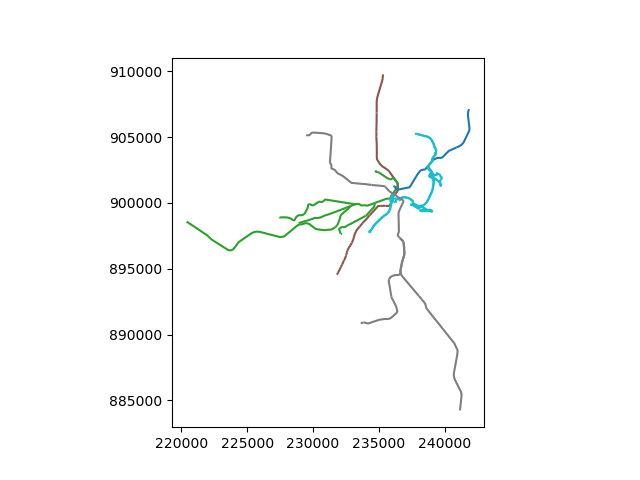

<AxesSubplot:>

In [9]:
mbta_lines.plot(column="LINE", cmap='tab10')

### Select By Attribute

In [10]:
mbta_lines.LINE.unique()

array(['SILVER', 'ORANGE', 'GREEN', 'RED', 'BLUE'], dtype=object)

In [11]:
green_line = mbta_lines[mbta_lines["LINE"]=="GREEN"]
green_line

,LINE,ROUTE,GRADE,SHAPE_LEN,geometry
22,GREEN,D - Riverside,1,1618.957543,"LINESTRING (231830.985 898312.562, 231847.343 ..."
23,GREEN,D - Riverside,7,196.041784,"LINESTRING (231700.045 898167.952, 231711.247 ..."
24,GREEN,D - Riverside,7,199.124804,"LINESTRING (232728.037 899595.257, 232735.149 ..."
25,GREEN,C - Cleveland Circle,7,360.242405,"LINESTRING (232504.049 899629.721, 232825.127 ..."
26,GREEN,B - Boston College,7,184.396047,"LINESTRING (233089.812 899912.687, 233191.155 ..."
27,GREEN,E - Health Street,3,1132.030977,"LINESTRING (232120.839 897609.087, 232127.141 ..."
28,GREEN,E - Health Street,7,1230.956752,"LINESTRING (233995.976 899018.149, 234007.399 ..."
29,GREEN,C D,7,458.876292,"LINESTRING (232842.768 899752.366, 233178.939 ..."
30,GREEN,B C D E,7,2121.006147,"LINESTRING (234670.367 899983.643, 234771.591 ..."
32,GREEN,C E,7,1241.873692,"LINESTRING (236291.833 901071.164, 236294.248 ..."


<IPython.core.display.Javascript object>


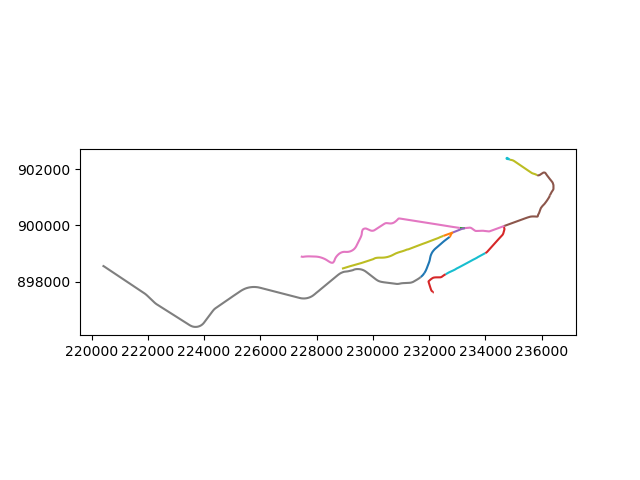

<AxesSubplot:>

In [12]:
green_line.geometry.plot(cmap='tab10')

### Color by Attribute

<sup>This example obtained from : https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/</sup>


In [13]:
import matplotlib.pyplot as plt
subway_colors = {'SILVER': 'grey',
               'ORANGE': 'orange',
               'GREEN': 'green',
               'RED': 'red',
                'BLUE':'blue'}

<IPython.core.display.Javascript object>


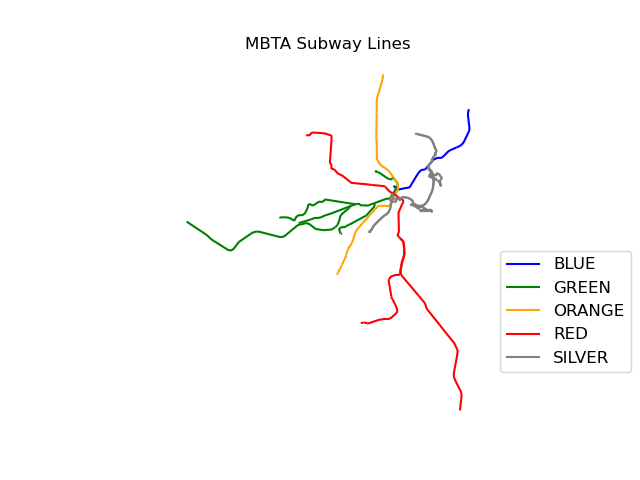

In [14]:
fig, ax = plt.subplots()
for ctype, data in mbta_lines.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color, ax=ax, label=ctype)
    
ax.legend(bbox_to_anchor=(1.5, .5), prop={'size': 12})
ax.set(title='MBTA Subway Lines')
ax.set_axis_off()

#mbta_stations.plot(ax=ax, color="black", zorder=1)
plt.show()

### Load data from Geodatabase

- *Geodatabase* is an ESRI developed model.  Similiar open source is *GeoPackage*.
- Both act like a database and will contain multiple layers.

In [15]:
import fiona
gdp_path = "tutorial_files/tlgdb_2019_a_25_ma.gdb"

fiona.listlayers(gdp_path)

['Block',
 'Census_Tract',
 'County_Subdivision',
 'Block_Group',
 'Census_Designated_Place',
 'County',
 'Incorporated_Place']

In [16]:
import geopandas
ma_block = geopandas.read_file(gdp_path, layer="Block_Group")

In [17]:
ma_block.head()

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,250010101001,Block Group 1,22251666.0,11702725.0,+42.0598291,-70.2004073,"MULTIPOLYGON (((-70.25001 42.06410, -70.24959 ..."
1,250010101002,Block Group 2,1325184.0,765208.0,+42.0620693,-70.1629235,"MULTIPOLYGON (((-70.18114 42.06232, -70.18109 ..."
2,250010101003,Block Group 3,485889.0,0.0,+42.0581234,-70.1828958,"MULTIPOLYGON (((-70.18884 42.05885, -70.18805 ..."
3,250010101004,Block Group 4,641686.0,162664.0,+42.0533919,-70.1874300,"MULTIPOLYGON (((-70.19574 42.05457, -70.19573 ..."
4,250010101005,Block Group 5,341792.0,135275.0,+42.0485956,-70.1901156,"MULTIPOLYGON (((-70.19674 42.04849, -70.19660 ..."


<IPython.core.display.Javascript object>


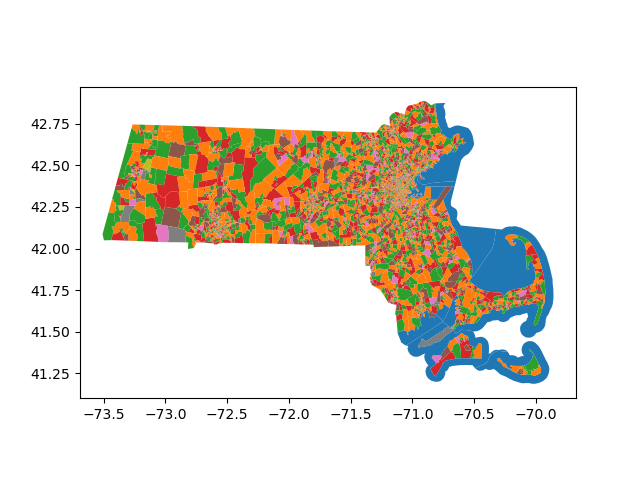

<AxesSubplot:>

In [18]:
ma_block.plot(column="NAMELSAD")

###  Common Standards of Vector Data
1. Points, Lines, and Polygon are not mixed together in one attribute table.
    

In [19]:
print("mbta_stations")
print(mbta_stations.geometry.type.unique())

print("\nmbta_lines")
print(mbta_lines.geometry.type.unique())

print("\nma_block")
print(ma_block.geometry.type.unique())

mbta_stations
['Point']

mbta_lines
['LineString' 'MultiLineString']

ma_block
['MultiPolygon']


2. Features of similiar characteristics refered to as "layer".

  - *mbta_lines* - Only contains features and attributes of MBTA subway tracks.
  - *mbta_stations* - Only contains features and attributes of subway station stops.
  - *ma_block* - Only contains features and attributes of census block groups.

### Metadata
information about the data
  - Who created the data?
  - How it was obtained?
  - Definition of attributes/fields.
  - Limitations of the data.
  
Example:
- https://www.mass.gov/info-details/massgis-data-municipalities
- https://www2.census.gov/geo/pdfs/maps-data/data/tiger/tgrshp2020/2020_TIGER_GDB_Record_Layouts.pdf



### Coordinate Reference System - CRS
Let's plot all three layers on a single map.

<IPython.core.display.Javascript object>


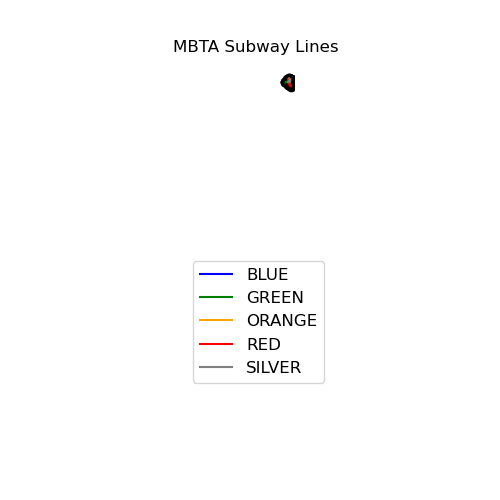

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))

for ctype, data in mbta_lines.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color, ax=ax, label=ctype)
    
ax.legend(bbox_to_anchor=(1.5, .5), prop={'size': 12})
ax.set(title='MBTA Subway Lines')
ax.set_axis_off()

mbta_stations.plot(ax=ax, color="black", zorder=1)  # MBTA Stations layer
ma_block.plot(ax=ax) # MA Group Block layer

plt.show()

In [21]:
print("mbta_lines CRS")
print(mbta_lines.crs)
print("\nmbta_stations CRS")
print(mbta_stations.crs)
print("\nma_block CRS")
print(ma_block.crs)

mbta_lines CRS
epsg:26986

mbta_stations CRS
epsg:26986

ma_block CRS
epsg:4269


# 4. Datum/Geographic Coordinate System

What coordinate system is GIS using?

### Step 1: Model a General Shape of the Earth (Datum)

The earth is generally round, but is not a perfect sphere or very smooth (e.g. mountains and canyons).

![alt text](files/images/datum.png)


Source: https://en.wikipedia.org/wiki/Ellipsoid

### Datums

- Datums are a models that approximates the earth's surface.
- Some datums are designed to be accurate for specific areas on the globe.

__Examples__:
- __Australian Geodetic Datum 1984__
- __North American Datum 1983 (NAD83)__
- __North American Datum 1927 (NAD27)__

Note: There are datums for referencing depth, such as North American Vertical Datum of 1988 (NAVD88)

### What is the Datum of a GIS File?

In [22]:
mbta_lines.crs
#ma_block.crs

<Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Step 2: Define a coordinate system

Let's review Cartesian Coordinate System

![alt text](files/images/cartesian_coord.png)

Source: https://www.e-education.psu.edu/natureofgeoinfo/c2_p10.html

### Geographic Coordinate System (GCS)
![alt text](files/images/gcs.png)

Source: http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm

### Geographic Coordinate System (GCS)

GCS help define a reference system for finding a location on the datum.

<img src="files/images/gcs_combined.png" alt="compass" style="width:500px"/>

Source: http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/geographic-coordinate-system.htm

### Geographic Coordinate System (GCS)
__Coordinates are associated with a specific GCS.__  Below is an outline of Boston City Hall.  The same coordinates were used to plot the outlines in two different GCSs.

<img src="files/images/GCS_comparison.png" alt="gcs_comparison" style="width:700px;"/>

The proper GCS for these coordinates is NAD 1927.

### Geographic Coordinate System (GCS)
- GIS data you download, or create, should have Datum/GCS defined. Otherwise the spatial component of the data is useless.
- GCS is part of the data model of most GIS files (Shapefiles, geodatabase), but not for CSV files!
- As a GIS user, most likely you will use existing Datum/GCS definitions available in GIS software, not create your own.

# 5. Projections

### What is wrong with this map?

<img src="files/images/what_is_wrong.png" alt="compass" style="width:400px"/>

| Country | Area ( $mi^2$) |
| ------- | -------------- |
|Africa   | 11,730,000     |
|Antartica | 5,405,000     |
|Greenland | 836,300       |

### Projections
Projections is a mathematical definition for transforming a GCS coordinates onto a flat surface (e.g. computer screen).

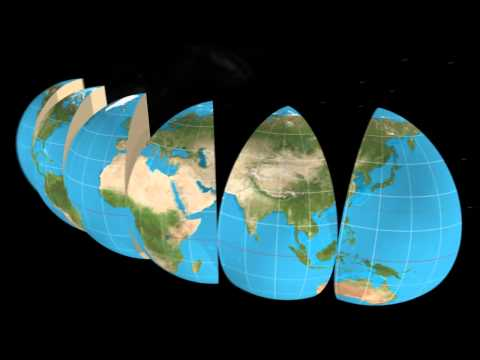

In [23]:
from IPython.display import YouTubeVideo
YouTubeVideo('CPQZ7NcQ6YQ')

### Projections - Families

<img src="files/images/projection_families.png" alt="compass" style="width:800px"/>

<sup>Source: https://docs.qgis.org/3.10/en/docs/gentle_gis_introduction/coordinate_reference_systems.html#id1</sup>

### Projections - Samples

<img src="files/images/projection_sample.png" alt="compass" style="width:1000px"/>

### Projections - Tissot's Indicatrix

<img src="files/images/tissots_indicatrix.png" alt="compass" style="width:1000px"/>

<sup>Source: http://geokov.com/education/map-projection.aspx</sup>

### Projections

- Allow creation of flat maps
- At the expense of distorting:
  - shape
  - area
  - direction
  - distance
 


There are two types of projections:
    
- Geographic Projection - Decimal Coordinates
- Projected Projection - Coordinates in Feet or Meters

# 6. Coordinate Reference System

__Geographic coordinate system__ and __projections__ are known as Coordinate Reference System (__CRS__) in GIS.

###  Selecting CRS

- __What CRS do I choose?__
  - Check if institutions or organization requires the use of a specific CRS.
  - Choose one that minimizes distortion characteristics important for your analysis.

- __When to assign CRS?__
  - GIS data does not have a CRS defined.
    
- __When to transform from one CRS to another CRS?__
  - Prior to spatial processing of two layers.
  - Plotting layers on a map.
  - Some GIS tools expect projected data.


### GeoPandas CRS Functions

<table>
<colgroup>
<col style="width: 10%" />
<col style="width: 90%" />
</colgroup>
<tbody>
<tr ><td><p><a href="https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.crs.html#geopandas.GeoDataFrame.crs">GeoDataFrame.crs</a></p></td>
<td><p>The Coordinate Reference System (CRS) represented as a pyproj.CRSobject.</p></td>
</tr>
<tr><td><p><a href="https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.to_crs.html#geopandas.GeoDataFrame.to_crs">GeoDataFrame.to_crs()</a></p></td>
<td><p>Transform geometries to a new coordinate reference system.</p></td>
</tr>
<tr><td><p><a href="https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.set_crs.html#geopandas.GeoDataFrame.set_crs">GeoDataFrame.set_crs()</a></p></td>
    <td><p>Set the Coordinate Reference System (CRS) of the GeoDataFrame. <b>### Only use if data does not have CRS defined! ###</b></p></td>
</tr>
</tbody>
</table>



### GeoPandas Accepted Definitions


- CRS WKT string
- __An authority string (i.e. “epsg:4326”)__
- __An EPSG integer code (i.e. 4326)__
- A pyproj.CRS
- An object with a to_wkt method.
- PROJ string
- Dictionary of PROJ parameters
- PROJ keyword arguments for parameters
- JSON string with PROJ parameters

<sup> source: https://geopandas.org/docs/user_guide/projections.html </sup>

### EPSG Codes

You can find library of EPSG codes at: https://spatialreference.org/

### Let's Play Around with CRS

In [24]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<IPython.core.display.Javascript object>


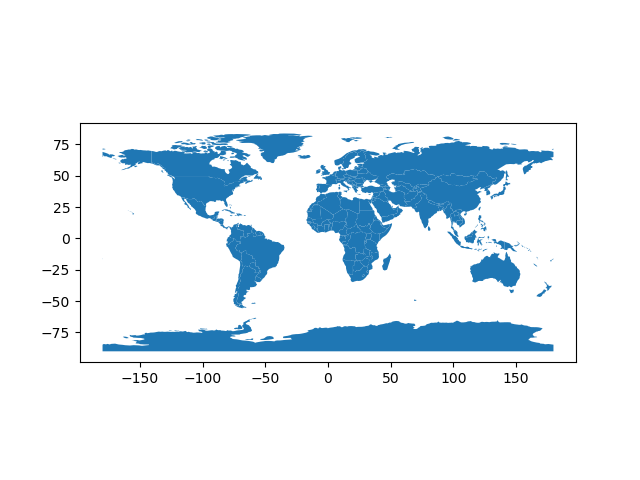

<AxesSubplot:>

In [26]:
world.plot()

<IPython.core.display.Javascript object>


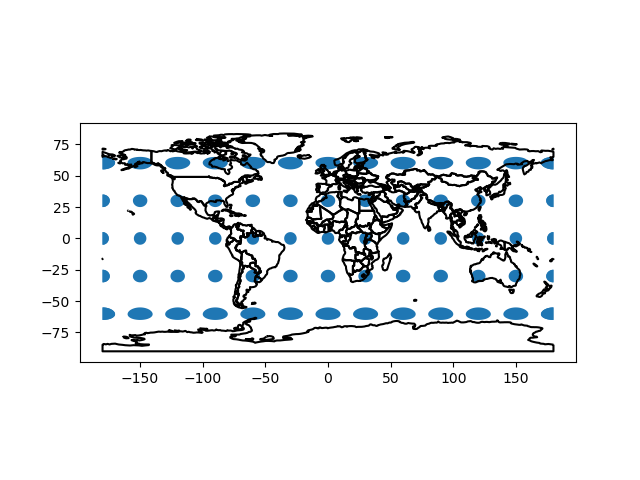

In [27]:
tissots = geopandas.read_file("tutorial_files/tissots_circles/Tissots_circles.shp")

if(world.crs != tissots.crs):
    print("CRS doesn't match.  Cannot plot.")
else:
    base = tissots.plot()
    world.boundary.plot(ax=base, color="black")


### Projections

- Lets convert to "WGS 84 / Australian Antarctic Polar Stereographic" projection.

In [28]:
world_3031 = world.to_crs("EPSG:3031")
tissots_3031 = tissots.to_crs("EPSG:3031")

world_3031.crs

<Projected CRS: EPSG:3031>
Name: WGS 84 / Antarctic Polar Stereographic
Axis Info [cartesian]:
- E[north]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Antarctica.
- bounds: (-180.0, -90.0, 180.0, -60.0)
Coordinate Operation:
- name: Antarctic Polar Stereographic
- method: Polar Stereographic (variant B)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<IPython.core.display.Javascript object>


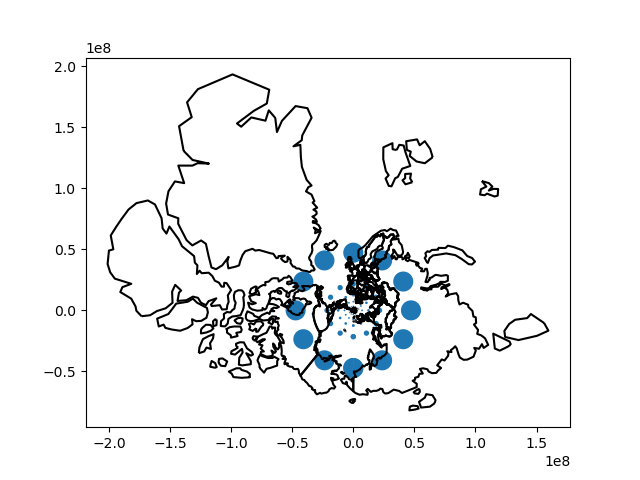

In [29]:
if(world_3031.crs != tissots_3031.crs):
    print("CRS doesn't match.  Cannot plot.")
else:
    base = tissots_3031.plot()
    world_3031.boundary.plot(ax=base, color="black")

In [30]:
world_3031.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

<IPython.core.display.Javascript object>


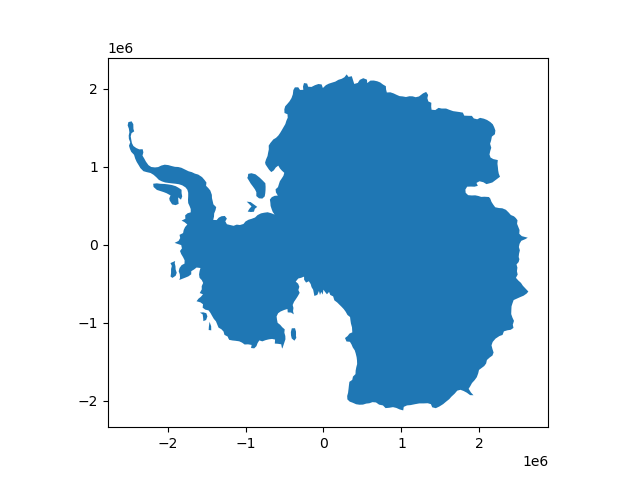

<AxesSubplot:>

In [31]:
antartica = world_3031[world_3031["continent"] == "Antarctica"]
antartica.plot()

In [32]:
antartica.total_bounds

array([-2511393.82380917, -2122511.82446786,  2627178.62591876,
        2186266.75507017])

<IPython.core.display.Javascript object>


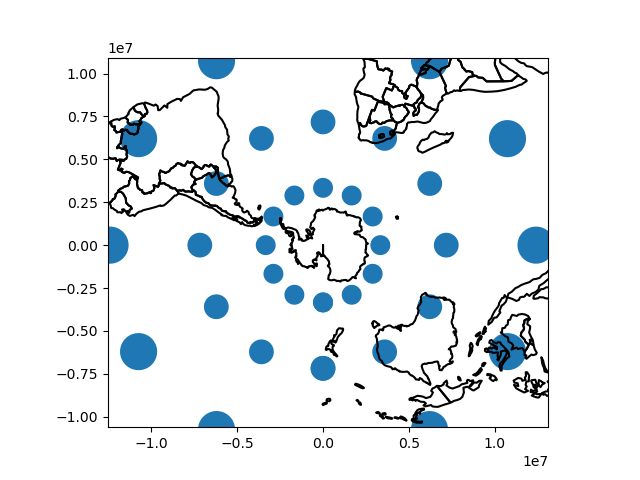

In [33]:
xmin, ymin, xmax, ymax = antartica.total_bounds

if(world_3031.crs != tissots_3031.crs):
    print("CRS doesn't match.  Cannot plot.")
else:
    base = tissots_3031.plot()
    base.set_xlim(xmin*(1+4), xmax*(1+4))
    base.set_ylim(ymin*(1+4), ymax*(1+4))
    
    world_3031.boundary.plot(ax=base, color="black")

### Additional Resources

- <a href="http://geokov.com/education/map-projection.aspx">Map Projections - types and distortion patterns</a>
- <a href="https://www.axismaps.com/guide/general/map-projections/">Map Projections</a>
- <a href="https://alastaira.wordpress.com/2011/01/23/the-google-maps-bing-maps-spherical-mercator-projection/">The Google Maps / Bing Maps Spherical Mercator Projection</a>
- <a href="http://bl.ocks.org/syntagmatic/raw/ba569633d51ebec6ec6e/">Exploratory Projection Widget</a>
- <a href="https://www.earthdatascience.org/">Earth Lab</a>

# Back to our Example

In [34]:
print("mbta_lines CRS")
print(mbta_lines.crs)
print("\nmbta_stations CRS")
print(mbta_stations.crs)
print("\nma_block CRS")
print(ma_block.crs)

mbta_lines CRS
epsg:26986

mbta_stations CRS
epsg:26986

ma_block CRS
epsg:4269


In [35]:
ma_block_proj = ma_block.to_crs(mbta_lines.crs)

<IPython.core.display.Javascript object>


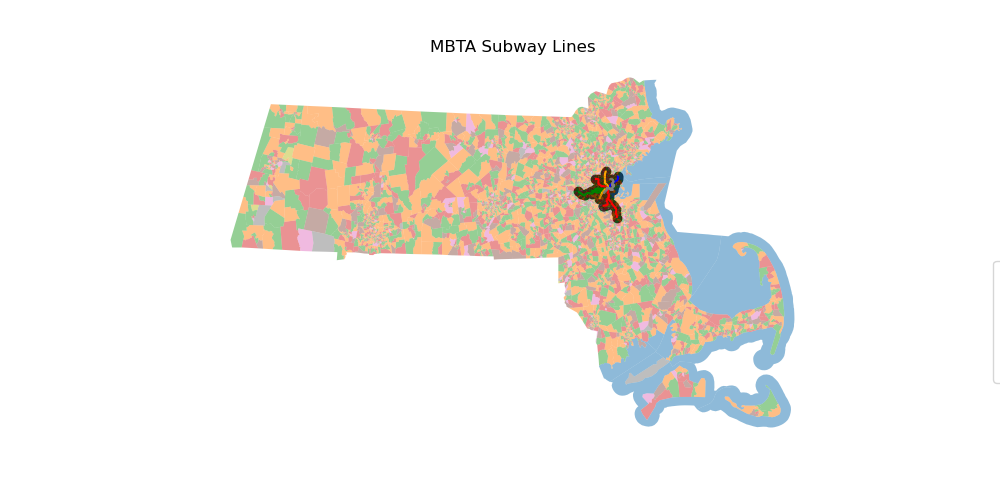

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
for ctype, data in mbta_lines.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color,
              ax=ax,
              label=ctype)
ax.legend(bbox_to_anchor=(1.5, .5), prop={'size': 12})
ax.set(title='MBTA Subway Lines')
ax.set_axis_off()
mbta_stations.plot(ax=ax, color="black", zorder=1)
ma_block_proj.plot(ax=ax,column="NAMELSAD", alpha=0.5)
plt.show()

In [37]:
bounds = mbta_lines.to_crs("EPSG:4269").total_bounds

<IPython.core.display.Javascript object>


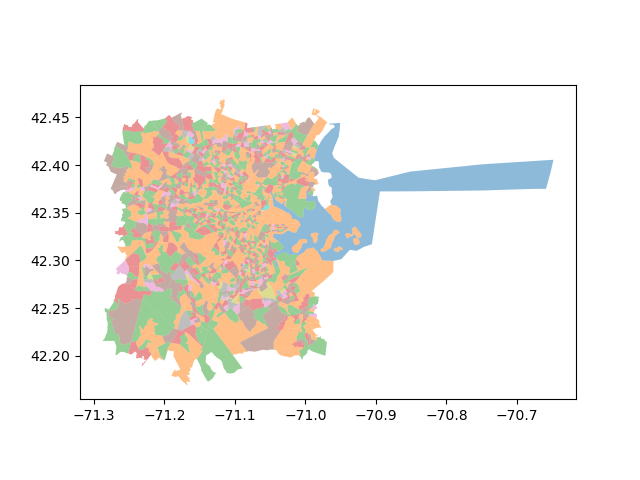

<AxesSubplot:>

In [38]:
ma_block = geopandas.read_file(gdp_path, layer="Block_Group", bbox=tuple(bounds) )
ma_block.plot(column="NAMELSAD", alpha=0.5)


In [39]:
# Need to convert to Mass Projection.
ma_block_proj = ma_block.to_crs(mbta_lines.crs)

<IPython.core.display.Javascript object>


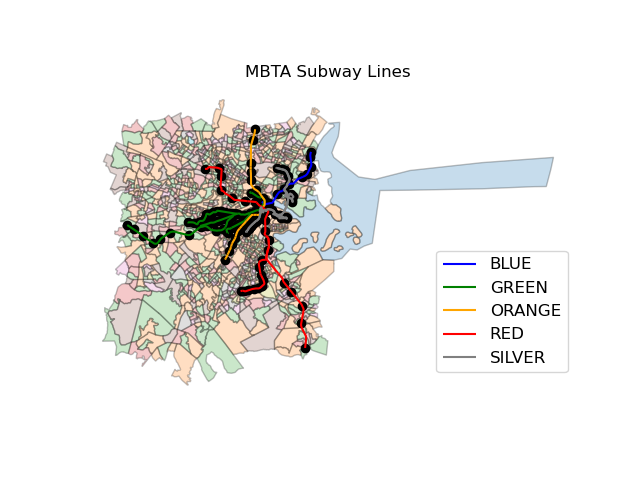

In [40]:
fig, ax = plt.subplots()
for ctype, data in mbta_lines.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color, ax=ax, label=ctype)
ax.legend(bbox_to_anchor=(1, .5), prop={'size': 12})
ax.set(title='MBTA Subway Lines')
ax.set_axis_off()
mbta_stations.plot(ax=ax, color="black", zorder=1, alpha=1)
ma_block_proj.plot(ax=ax, zorder=0, column="NAMELSAD", alpha=0.25, edgecolor="black")
plt.show()

# 7. Spatial Feature Attributes
- This is focused on just one layer.
- What is the length/area of each feature?
- What is the distance from one feature to another?

### Area

In [41]:
ma_block.columns

Index(['GEOID', 'NAMELSAD', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry'],
      dtype='object')

In [42]:
ma_block.area

C:\Users\milechin\AppData\Local\Temp/ipykernel_10828/2369124777.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ma_block.area


0       0.000314
1       0.000261
2       0.000045
3       0.000012
4       0.000017
          ...   
1337    0.000085
1338    0.000231
1339    0.000278
1340    0.000125
1341    0.000036
Length: 1342, dtype: float64

In [43]:
ma_block.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [44]:
ma_block_proj = ma_block.to_crs("EPSG:26986")
ma_block_proj.crs

<Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meters)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [45]:
ma_block_proj.area

0       2.870299e+06
1       2.384737e+06
2       4.111833e+05
3       1.107594e+05
4       1.511032e+05
            ...     
1337    7.805856e+05
1338    2.114695e+06
1339    2.546468e+06
1340    1.145376e+06
1341    3.287178e+05
Length: 1342, dtype: float64

In [46]:
ma_block_proj["area"] = ma_block_proj.area
ma_block_proj.head()

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area
0,250092081021,Block Group 1,1853959.0,1016489.0,+42.4436785,-70.9808120,"MULTIPOLYGON (((241361.563 909071.294, 241374....",2.870299e+06
1,250092081024,Block Group 4,2235804.0,149062.0,+42.4399938,-71.0022750,"MULTIPOLYGON (((240120.288 910027.712, 240123....",2.384737e+06
2,250173391002,Block Group 2,411205.0,0.0,+42.4261099,-71.1067042,"MULTIPOLYGON (((232070.214 908653.460, 232073....",4.111833e+05
3,250173394003,Block Group 3,110764.0,0.0,+42.4138334,-71.1229358,"MULTIPOLYGON (((230826.999 907197.970, 230850....",1.107594e+05
4,250173394004,Block Group 4,151111.0,0.0,+42.4130793,-71.1269863,"MULTIPOLYGON (((230476.023 907067.586, 230516....",1.511032e+05


What are the units of *area*?

### Perimeter

In [47]:
ma_block_proj["perimeter_m"] = ma_block_proj.length
ma_block_proj.head()

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,perimeter_m
0,250092081021,Block Group 1,1853959.0,1016489.0,+42.4436785,-70.9808120,"MULTIPOLYGON (((241361.563 909071.294, 241374....",2.870299e+06,11928.671904
1,250092081024,Block Group 4,2235804.0,149062.0,+42.4399938,-71.0022750,"MULTIPOLYGON (((240120.288 910027.712, 240123....",2.384737e+06,7448.299165
2,250173391002,Block Group 2,411205.0,0.0,+42.4261099,-71.1067042,"MULTIPOLYGON (((232070.214 908653.460, 232073....",4.111833e+05,2736.382141
3,250173394003,Block Group 3,110764.0,0.0,+42.4138334,-71.1229358,"MULTIPOLYGON (((230826.999 907197.970, 230850....",1.107594e+05,1389.491854
4,250173394004,Block Group 4,151111.0,0.0,+42.4130793,-71.1269863,"MULTIPOLYGON (((230476.023 907067.586, 230516....",1.511032e+05,2149.907041


### Centroid

In [48]:
ma_block_proj["centroid"] = ma_block_proj.centroid
ma_block_proj.head()

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,perimeter_m,centroid
0,250092081021,Block Group 1,1853959.0,1016489.0,+42.4436785,-70.9808120,"MULTIPOLYGON (((241361.563 909071.294, 241374....",2.870299e+06,11928.671904,POINT (242583.220 910396.035)
1,250092081024,Block Group 4,2235804.0,149062.0,+42.4399938,-71.0022750,"MULTIPOLYGON (((240120.288 910027.712, 240123....",2.384737e+06,7448.299165,POINT (241171.379 910077.315)
2,250173391002,Block Group 2,411205.0,0.0,+42.4261099,-71.1067042,"MULTIPOLYGON (((232070.214 908653.460, 232073....",4.111833e+05,2736.382141,POINT (232365.555 908473.523)
3,250173394003,Block Group 3,110764.0,0.0,+42.4138334,-71.1229358,"MULTIPOLYGON (((230826.999 907197.970, 230850....",1.107594e+05,1389.491854,POINT (231035.835 907103.854)
4,250173394004,Block Group 4,151111.0,0.0,+42.4130793,-71.1269863,"MULTIPOLYGON (((230476.023 907067.586, 230516....",1.511032e+05,2149.907041,POINT (230702.816 907018.625)


In [49]:
ma_block_proj.dtypes

GEOID            object
NAMELSAD         object
ALAND           float64
AWATER          float64
INTPTLAT         object
INTPTLON         object
geometry       geometry
area            float64
perimeter_m     float64
centroid       geometry
dtype: object

Note that there are two geometry columns!

<IPython.core.display.Javascript object>


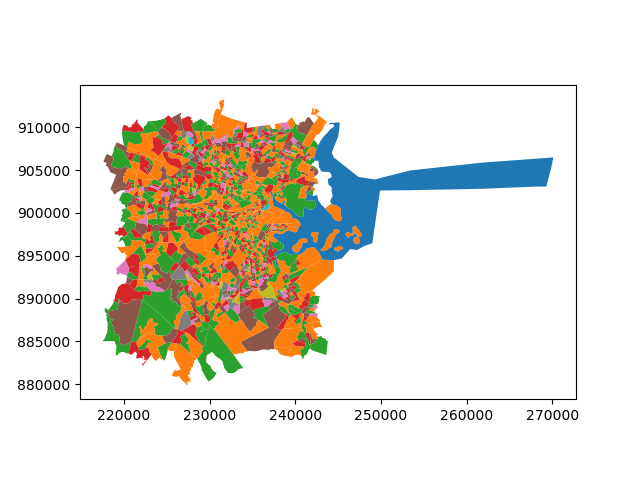

<AxesSubplot:>

In [50]:
ma_block_proj.plot(column="NAMELSAD")

In [51]:
ma_block_proj.geometry.name

'geometry'

<IPython.core.display.Javascript object>


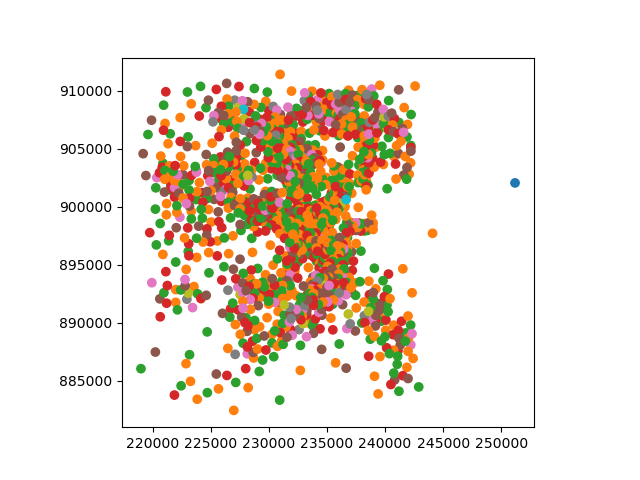

<AxesSubplot:>

In [52]:
ma_block_proj = ma_block_proj.set_geometry('centroid')
ma_block_proj.plot(column="NAMELSAD")

In [53]:
ma_block_proj = ma_block_proj.set_geometry('geometry')

# 8. Spatial Processing
Spatial Processing allows us to ask questions regarding two layers.
- What are the nearest block groups to Kenmore Station?
- Which block groups have an MBTA station?
- Which block groups have MBTA lines that pass through them?
- Which block groups are within one mile radius of MBTA tracks?

### Distance
What are the nearest blocks groups to Kenmore station?

In [54]:
kenmore_station = mbta_stations.loc[mbta_stations['STATION'] == "Kenmore"]

type(kenmore_station.geometry.iloc[0])

shapely.geometry.point.Point

In [55]:
ma_block_proj["dist_to_kenmore_m"] = ma_block_proj.distance(kenmore_station.geometry.iloc[0])
ma_block_proj.head(n=3)

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,perimeter_m,centroid,dist_to_kenmore_m
0,250092081021,Block Group 1,1853959.0,1016489.0,+42.4436785,-70.9808120,"MULTIPOLYGON (((241361.563 909071.294, 241374....",2.870299e+06,11928.671904,POINT (242583.220 910396.035),12185.227824
1,250092081024,Block Group 4,2235804.0,149062.0,+42.4399938,-71.0022750,"MULTIPOLYGON (((240120.288 910027.712, 240123....",2.384737e+06,7448.299165,POINT (241171.379 910077.315),11792.403102
2,250173391002,Block Group 2,411205.0,0.0,+42.4261099,-71.1067042,"MULTIPOLYGON (((232070.214 908653.460, 232073....",4.111833e+05,2736.382141,POINT (232365.555 908473.523),8197.956593


<IPython.core.display.Javascript object>


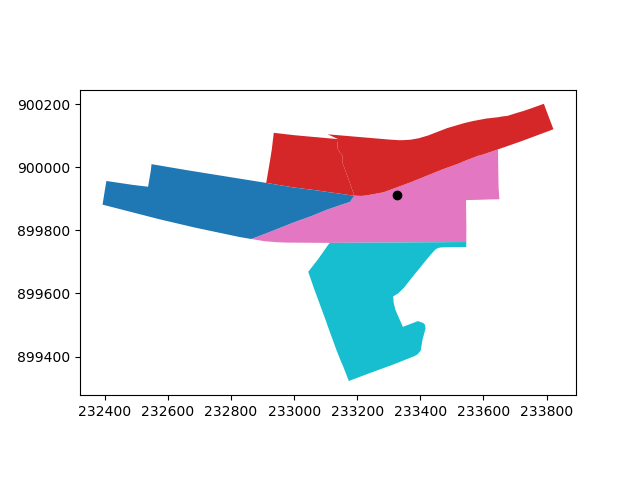

<AxesSubplot:>

In [56]:
near_kenmore = ma_block_proj.sort_values(['dist_to_kenmore_m'], ascending=[True]).head(n=5)

base = near_kenmore.plot(column="NAMELSAD")
kenmore_station.plot(ax=base, zorder=2, color="black")

### Within
Which Census Block Groups have an MBTA Station?

In [57]:
ma_block_proj["w_station"] = ma_block_proj.geometry.apply(lambda x: mbta_stations.geometry.within(x).any())
ma_block_proj.head(n=3)

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,perimeter_m,centroid,dist_to_kenmore_m,w_station
0,250092081021,Block Group 1,1853959.0,1016489.0,+42.4436785,-70.9808120,"MULTIPOLYGON (((241361.563 909071.294, 241374....",2.870299e+06,11928.671904,POINT (242583.220 910396.035),12185.227824,False
1,250092081024,Block Group 4,2235804.0,149062.0,+42.4399938,-71.0022750,"MULTIPOLYGON (((240120.288 910027.712, 240123....",2.384737e+06,7448.299165,POINT (241171.379 910077.315),11792.403102,False
2,250173391002,Block Group 2,411205.0,0.0,+42.4261099,-71.1067042,"MULTIPOLYGON (((232070.214 908653.460, 232073....",4.111833e+05,2736.382141,POINT (232365.555 908473.523),8197.956593,False


<IPython.core.display.Javascript object>


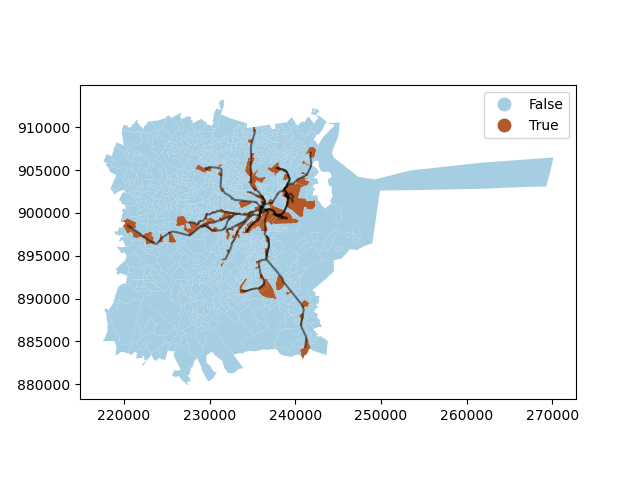

<AxesSubplot:>

In [58]:
base = ma_block_proj.plot(column="w_station", legend=True, categorical=True, cmap="Paired")
mbta_lines.plot(ax=base, color="black", alpha=0.5)

### Spatial Join
- Joining the attributes of two layers based on their spatial location to each other.
- Spatial joins are normally done with point and polygon layers, line and polygon layers, or line and line layers.

__Contains__ - Do any points exist inside the polygon?
<img src="files/images/sjoin_contains.png" alt="compass" style="width:500px"/>    


Note: Since three points exist within the polygon, the ouput of this process will result in 3 identical polygons but different attributes of each point.

### Example

In [59]:
print("ma_block_proj")
print(ma_block_proj.columns)
print("\nmbta_stations")
print(mbta_stations.columns)

ma_block_proj
Index(['GEOID', 'NAMELSAD', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry', 'area', 'perimeter_m', 'centroid', 'dist_to_kenmore_m',
       'w_station'],
      dtype='object')

mbta_stations
Index(['STATION', 'LINE', 'TERMINUS', 'ROUTE', 'geometry'], dtype='object')


In [60]:
blocks_w_stations = geopandas.sjoin(ma_block_proj, mbta_stations, how="inner", op='contains')
blocks_w_stations.head(n=2)

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,perimeter_m,centroid,dist_to_kenmore_m,w_station,index_right,STATION,LINE,TERMINUS,ROUTE
46,250173398011,Block Group 1,720396.0,196154.0,+42.4083630,-71.0768064,"MULTIPOLYGON (((234295.577 905583.857, 234315....",916496.413772,6005.014107,POINT (234821.295 906099.762),5505.650538,True,17,Wellington,ORANGE,N,Forest Hills to Oak Grove
66,250173411012,Block Group 2,151776.0,0.0,+42.4374848,-71.0725325,"MULTIPOLYGON (((235000.038 909913.443, 235039....",151765.988797,1749.280015,POINT (235171.292 909750.542),9646.668308,True,15,Oak Grove,ORANGE,Y,Forest Hills to Oak Grove


In [61]:
blocks_w_stations["LINE"].unique()

array(['ORANGE', 'RED', 'GREEN', 'GREEN/ORANGE', 'BLUE', 'BLUE/ORANGE',
       'BLUE/GREEN', 'SILVER', 'ORANGE/RED', 'GREEN/RED'], dtype=object)

In [62]:
subway_colors = {'SILVER': 'grey',
               'ORANGE': 'orange',
               'GREEN': 'green',
               'RED': 'red',
                'BLUE':'blue',
                'GREEN/ORANGE': 'yellow',
                'BLUE/GREEN': 'yellow',
                'ORANGE/RED': 'yellow',
                'GREEN/RED': 'yellow',
                'BLUE/ORANGE': 'yellow'}

<IPython.core.display.Javascript object>


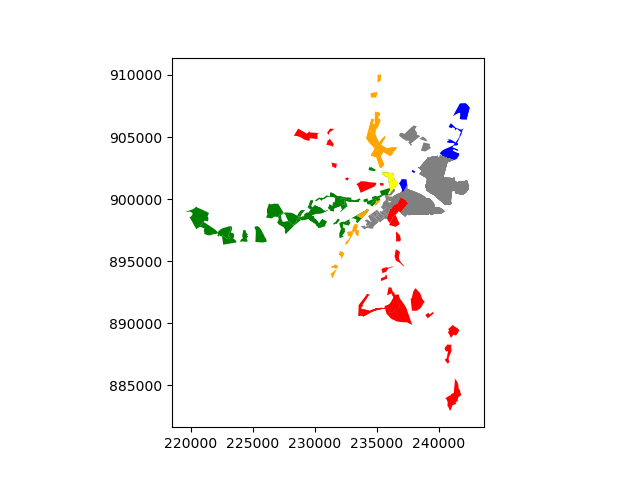

In [63]:
fig, ax = plt.subplots()
for ctype, data in blocks_w_stations.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color, ax=ax, label=ctype)
plt.show()

```python
geopandas.sjoin(ma_block_proj, mbta_stations, how= , op="contains")
```

__how__ options:
- __left__ - Retain all __ma_block_proj__ features and append __mbta_stations__ attributes where the result of "op" is True.
- __inner__ - Retain only __ma_block_proj__ features where the result of "op" is True and append __mbta_stations__ attributes to __ma_block_proj__ that satisfy the "op".
- __right__ - Retain all __mbta_stations__ features and append __ma_block_proj__ where the result of "op" is True.

<sup> Source: https://geopandas.org/docs/user_guide/mergingdata.html#sjoin-arguments</sup>

In [64]:
print("ma_block_proj")
print(ma_block_proj.columns)
print(ma_block_proj.shape)
print("\nmbta_stations")
print(mbta_stations.columns)
print(mbta_stations.shape)

ma_block_proj
Index(['GEOID', 'NAMELSAD', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry', 'area', 'perimeter_m', 'centroid', 'dist_to_kenmore_m',
       'w_station'],
      dtype='object')
(1342, 12)

mbta_stations
Index(['STATION', 'LINE', 'TERMINUS', 'ROUTE', 'geometry'], dtype='object')
(166, 5)


In [65]:
# Note to Dennis, do "right" first

blocks_w_stations = geopandas.sjoin(ma_block_proj, mbta_stations, how="inner", op='contains')
print(blocks_w_stations.shape)
blocks_w_stations.columns

(166, 17)


Index(['GEOID', 'NAMELSAD', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry', 'area', 'perimeter_m', 'centroid', 'dist_to_kenmore_m',
       'w_station', 'index_right', 'STATION', 'LINE', 'TERMINUS', 'ROUTE'],
      dtype='object')

In [66]:
blocks_w_stations[["GEOID", "STATION"]].groupby(by="GEOID").count().sort_values(by="STATION", ascending=False ).head(15)

,STATION
GEOID,
250259813002,8
250259812021,7
250250606001,4
250250303003,4
250250704021,3
250214163005,3
250250007031,3
250250008032,3
250250104051,3


In [67]:
blocks_w_stations[blocks_w_stations["GEOID"] == "250259813002"]["STATION"]

1318    Airport Terminal B1
1318    Airport Terminal B2
1318     Airport Terminal A
1318     Airport Terminal C
1318     Airport Terminal E
1318                Airport
1318                Airport
1318            Wood Island
Name: STATION, dtype: object

###  Intersect
Do any line segments intersect the polygon?
<img src="files/images/sjoin_intersect.png" alt="compass" style="width:500px"/>    

What Census Group Blocks have MBTA Rapid transit tracks going through them?

<IPython.core.display.Javascript object>


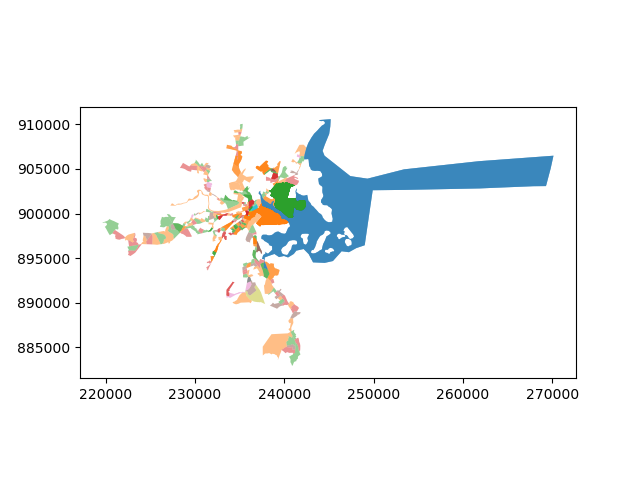

In [68]:
blocks_w_lines = geopandas.sjoin(ma_block_proj, mbta_lines, how="inner", op='intersects')

base = blocks_w_lines.plot(column="NAMELSAD", alpha=0.5)
#mbta_lines.plot(ax=base, color="black")

GeoPandas uses the following operators:
- __contains__ -  Returns True if no points of other lie in the exterior of the object and at least one point of the interior of other lies in the interior of object.
- __crosses__ - Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.
- __disjoint__ - Returns True if the boundary and interior of the object do not intersect at all with those of the other.
- __intersects__ - Returns True if the boundary or interior of the object intersect in any way with those of the other. In other words, geometric objects intersect if they have any boundary or interior point in common.
- __overlaps__ - Returns True if the geometries have more than one but not all points in common, have the same dimension, and the intersection of the interiors of the geometries has the same dimension as the geometries themselves.
- __touches__ - Returns True if the objects have at least one point in common and their interiors do not intersect with any part of the other.
- __within__ - Returns True if the object’s boundary and interior intersect only with the interior of the other (not its boundary or exterior).

<sup>Source: https://shapely.readthedocs.io/en/stable/manual.html?highlight=binary%20predicates#binary-predicates</sup>

### Buffer, Dissolve, Overlay
What Census Group Blocks are within 800 meters of MBTA Rapid Transit tracks?

In [69]:
mbta_lines["buffer"] = mbta_lines.buffer(800)
mbta_lines.head()

,LINE,ROUTE,GRADE,SHAPE_LEN,geometry,buffer
0,SILVER,SL3,3,79.538315,"LINESTRING (238786.088 902727.200, 238786.654 ...","POLYGON ((237988.435 902789.026, 237988.833 90..."
1,SILVER,SL3,1,439.557315,"LINESTRING (238823.606 904952.475, 238807.669 ...","POLYGON ((238408.108 904269.318, 238380.245 90..."
2,SILVER,SL3,1,680.245154,"LINESTRING (237840.206 905243.356, 237838.544 ...","POLYGON ((237777.987 904430.578, 237687.172 90..."
3,SILVER,SL3,1,590.780545,"LINESTRING (238411.712 905095.055, 238375.464 ...","POLYGON ((237918.786 904397.361, 237903.194 90..."
4,SILVER,SL3,1,819.160963,"LINESTRING (239198.867 904254.943, 239205.640 ...","POLYGON ((238341.507 904315.018, 238296.885 90..."


(138, 6)


<IPython.core.display.Javascript object>


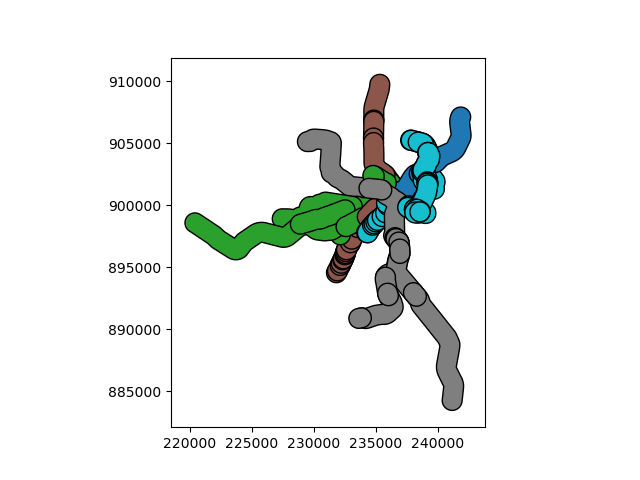

<AxesSubplot:>

In [70]:
mbta_lines = mbta_lines.set_geometry("buffer")
print(mbta_lines.shape)
mbta_lines.plot(column="LINE", edgecolor="black")

In [71]:
mbta_buffers = mbta_lines.dissolve(by="LINE", aggfunc='sum')
mbta_buffers.head()

,buffer,GRADE,SHAPE_LEN
LINE,,,
BLUE,"POLYGON ((235509.296 900732.110, 235458.685 90...",29,9562.135947
GREEN,"POLYGON ((219831.855 898003.194, 219778.538 89...",79,36595.881098
ORANGE,"POLYGON ((231233.214 895162.228, 231236.989 89...",125,17837.914956
RED,"POLYGON ((237654.246 892136.037, 237654.246 89...",51,38021.464542
SILVER,"POLYGON ((235113.702 897538.164, 235100.483 89...",279,38462.798936


(5, 4)


<IPython.core.display.Javascript object>


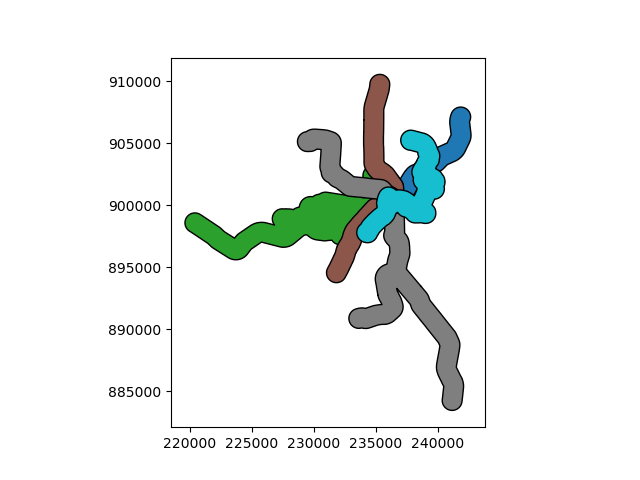

<AxesSubplot:>

In [72]:
mbta_buffers["LINE"] = mbta_buffers.index
print(mbta_buffers.shape)
mbta_buffers.plot(edgecolor="black", column="LINE")

In [73]:
ma_block_proj.columns

Index(['GEOID', 'NAMELSAD', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry', 'area', 'perimeter_m', 'centroid', 'dist_to_kenmore_m',
       'w_station'],
      dtype='object')

In [74]:
blocks_within_buffer = geopandas.overlay(ma_block_proj, mbta_buffers, how="intersection")
blocks_within_buffer.head(n=3)

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,area,perimeter_m,centroid,dist_to_kenmore_m,w_station,GRADE,SHAPE_LEN,LINE,geometry
0,250173395001,Block Group 1,542303.0,0.0,+42.4093832,-71.1183012,542272.367477,4272.212239,POINT (231419.518 906611.235),6117.678667,False,51,38021.464542,RED,"POLYGON ((231717.456 905823.333, 231703.592 90..."
1,250173396003,Block Group 3,133453.0,0.0,+42.4030854,-71.1113939,133446.109499,2203.995625,POINT (231991.275 905914.265),5769.836056,False,51,38021.464542,RED,"POLYGON ((231717.456 905823.333, 231719.850 90..."
2,250173504005,Block Group 5,106711.0,0.0,+42.3995760,-71.1155899,106704.580096,1448.861368,POINT (231647.608 905522.880),5628.213299,False,51,38021.464542,RED,"POLYGON ((231475.358 905598.198, 231512.653 90..."


<IPython.core.display.Javascript object>


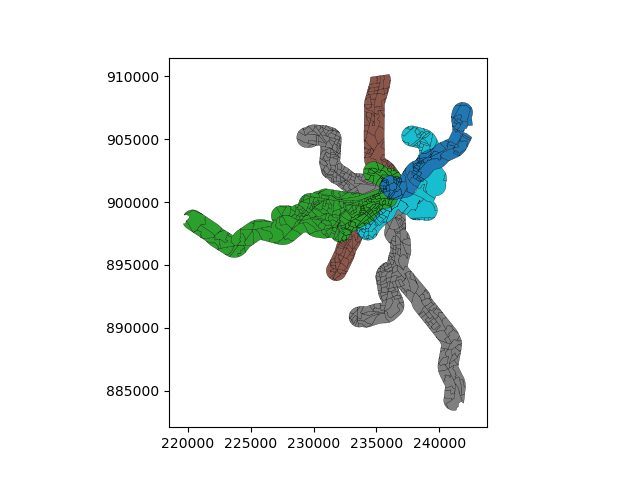

<AxesSubplot:>

In [75]:
blocks_within_buffer.plot(column="LINE", edgecolor="black", linewidth=0.2)

In [78]:
blocks_within_buffer["area_in_buffer"] = blocks_within_buffer.area

In [79]:
blocks_within_buffer[["area", "area_in_buffer"]].head(n=3)

,area,area_in_buffer
0,542272.367477,434.009685
1,133446.109499,23537.552337
2,106704.580096,106704.580096


In [80]:
blocks_within_buffer["area_ratio"] = blocks_within_buffer["area_in_buffer"]/blocks_within_buffer["area"] 
blocks_within_buffer[["area", "area_in_buffer", "area_ratio"]].head(n=3)

,area,area_in_buffer,area_ratio
0,542272.367477,434.009685,0.000800
1,133446.109499,23537.552337,0.176382
2,106704.580096,106704.580096,1.000000


More information about overlay function: https://geopandas.org/docs/user_guide/set_operations.html

# Saving GIS Data

There are many GIS data formats that exist.  You will be limited to what you can export to, based on what libraries are installed on your system.

In [81]:
import fiona
fiona.supported_drivers

{'ARCGEN': 'r',
 'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'rw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'GPSTrackMaker': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'rw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

__r__ - read  
__a__ - append  
__w__ - write  

GeoDatabase format falls under *OpenFileGDB*.

### Save layers as GeoPackage


<sup>https://www.geopackage.org/</sup>

In [82]:
blocks_w_stations.to_file("tut_output.gpkg", driver="GPKG", layer="blocks_w_stations")

TypeError: Cannot interpret '<geopandas.array.GeometryDtype object at 0x0000016CFD1C8520>' as a data type

The error is not clear, but it is complaining there are two "geometry" fields in this layer.  Most file formats only support one geometry field.

In [83]:
blocks_w_stations.dtypes

GEOID                  object
NAMELSAD               object
ALAND                 float64
AWATER                float64
INTPTLAT               object
INTPTLON               object
geometry             geometry
area                  float64
perimeter_m           float64
centroid             geometry
dist_to_kenmore_m     float64
w_station                bool
index_right             int64
STATION                object
LINE                   object
TERMINUS               object
ROUTE                  object
dtype: object

In [84]:
# Set the appropriate geometry column you want to save
blocks_w_stations.set_geometry("geometry", inplace=True)

# Remove the other geometry column
blocks_w_stations.drop(columns=["centroid"], inplace=True)

# Save the layer in a GeoPackage
blocks_w_stations.to_file("tut_output.gpkg", driver="GPKG", layer="blocks_w_stations")

In [85]:
fiona.listlayers("tut_output.gpkg")

['ma_block_proj', 'mbta_lines', 'blocks_w_lines', 'blocks_w_stations']

In [86]:
blocks_within_buffer.set_geometry("geometry", inplace=True)
blocks_within_buffer.drop(columns=["centroid"], inplace=True)

ma_block_proj.set_geometry("geometry", inplace=True)
ma_block_proj.drop(columns=["centroid"], inplace=True)

mbta_lines.set_geometry("geometry", inplace=True)
mbta_lines.drop(columns=["buffer"], inplace=True)

blocks_w_lines.set_geometry("geometry", inplace=True)
blocks_w_lines.drop(columns=["centroid"], inplace=True)

In [ ]:
blocks_within_buffer.to_file("test.gpkg", driver="GPKG", layer="blocks_within_buffer")
ma_block_proj.to_file("tut_output.gpkg", driver="GPKG", layer="ma_block_proj")
mbta_lines.to_file("tut_output.gpkg", driver="GPKG", layer="mbta_lines")
blocks_w_lines.to_file("tut_output.gpkg", driver="GPKG", layer="blocks_w_lines")

In [ ]:
fiona.listlayers("tut_output.gpkg")

# Questions?


## Data Sources
- Tissot Circle - https://mgimond.github.io/ArcGIS_tutorials/Tissot_circle.htm  
- Mass. Census Boundary Data - https://www2.census.gov/geo/tiger/TGRGDB19/tlgdb_2019_a_25_ma.gdb.zip  
- MBTA Rapid Transit - https://www.mass.gov/info-details/massgis-data-mbta-rapid-transit